In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from classification.utils import (
    training_model,
    training_history,
    preprocessing,
    performance_evaluation,
)
from glob import glob

np.set_printoptions(precision=4, suppress=True)

plt.style.use("seaborn-v0_8-paper")
plt.style.use("styles/l3_mod.mplstyle")

In [2]:
data_folder = "001points"
data_path = os.path.join("data", "experimental", "classification", data_folder)

train_files = glob(os.path.join(data_path, "train_data*.csv"))
valid_files = glob(os.path.join(data_path, "valid_data*.csv"))

train_data = pd.read_csv(train_files[0])
valid_data = pd.read_csv(valid_files[0])

print(f"train: {train_data.shape}, valid: {valid_data.shape}")

train: (1111, 34), valid: (139, 34)


In [3]:
# training
hparams = [
    {"hidden_layers": [32], "activation": tf.keras.activations.relu},
    {"hidden_layers": [], "activation": tf.keras.activations.relu},
    {"hidden_layers": [32, 32, 32], "activation": tf.keras.activations.swish},
]

results = []
for hp in hparams:
    r = training_model(train_files, valid_files, **hp)
    results.append(r)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
perf = performance_evaluation(results, valid_files)

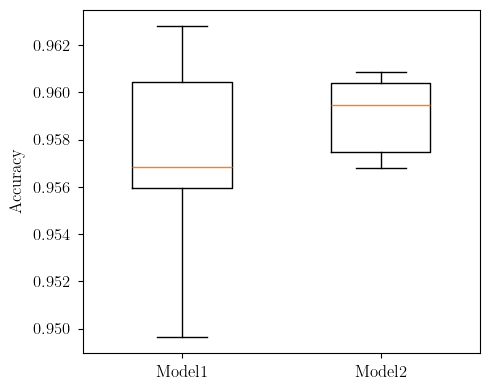

In [21]:
accuracy = perf["accuracy"]

f, ax = plt.subplots(figsize=(5, 4))


ax.boxplot(accuracy, widths=0.5)
ax.set_xticks(
    np.arange(1, len(results) + 1),
    labels=[f"Model{i+1}" for i in np.arange(len(results))],
)
ax.set_ylabel("Accuracy")
plt.show()